In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [174]:
class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 64), # Input layer with 1 input and 64 neurons
            # nn.LeakyReLU(),        # Activation function
            # nn.Tanh(),
            # nn.ReLU(),
            nn.ELU(),
            nn.Linear(64, 64),# Hidden layer with 64 neurons
            # nn.LeakyReLU(),        # Activation function
            # nn.Tanh(),
            # nn.ReLU(),
            nn.ELU(),
            nn.Linear(64, 1)  # Output layer with 1 output
        )
    
    def forward(self, x):
        return self.network(x)

In [175]:
# Prepare the training data
x_values = np.linspace(-2*np.pi, 2*np.pi, 400)
x_train = torch.tensor(x_values.reshape(-1, 1), dtype=torch.float)
y_train_sin = torch.tensor(np.sin(x_values).reshape(-1, 1), dtype=torch.float)
y_train_exp_sin = torch.tensor(np.exp(np.sin(x_values)).reshape(-1, 1), dtype=torch.float)
y_train_3grad = torch.tensor(x_values**3+x_values**2, dtype=torch.float)


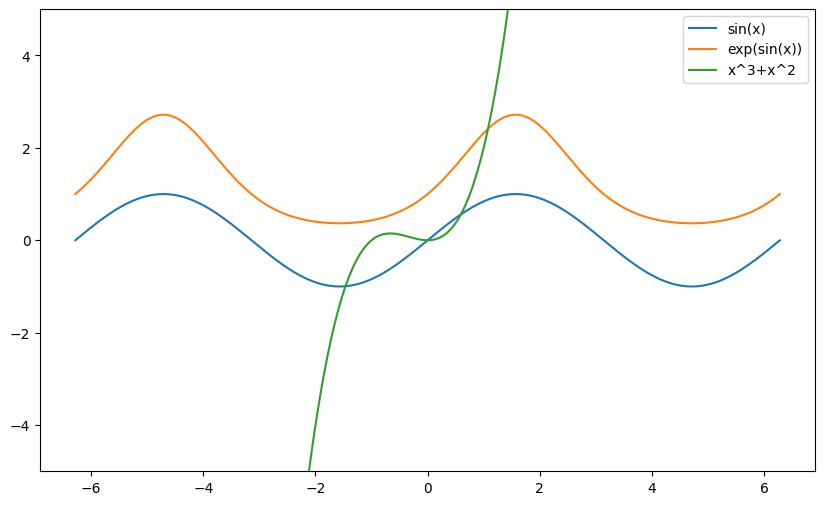

In [176]:
# Plot the different functions, normlaized to fit the same screen
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_train_sin, label="sin(x)")
plt.plot(x_values, y_train_exp_sin, label="exp(sin(x))")
plt.plot(x_values, y_train_3grad, label="x^3+x^2")
plt.legend()
plt.ylim(-5, 5)
plt.show()

In [177]:
# Instantiate the model
model = SineApproximator()

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [178]:
epochs = 4000
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()           # Clear gradients for the next train
    output = model(x_train)         # Forward pass: Compute predicted y by passing x to the model
    loss = criterion(output, y_train_sin)# Compute loss
    loss.backward()                 # Backward pass: Compute gradient of the loss with respect to model parameters
    optimizer.step()                # Update weights
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 1/4000, Loss: 0.5689460635185242
Epoch 101/4000, Loss: 0.3664339482784271
Epoch 201/4000, Loss: 0.2838807702064514
Epoch 301/4000, Loss: 0.21818745136260986
Epoch 401/4000, Loss: 0.17956767976284027
Epoch 501/4000, Loss: 0.15860162675380707
Epoch 601/4000, Loss: 0.14368997514247894
Epoch 701/4000, Loss: 0.13029944896697998
Epoch 801/4000, Loss: 0.11706161499023438
Epoch 901/4000, Loss: 0.10362569987773895
Epoch 1001/4000, Loss: 0.09030034393072128
Epoch 1101/4000, Loss: 0.07751422375440598
Epoch 1201/4000, Loss: 0.06543368846178055
Epoch 1301/4000, Loss: 0.0541338175535202
Epoch 1401/4000, Loss: 0.043417271226644516
Epoch 1501/4000, Loss: 0.0339871346950531
Epoch 1601/4000, Loss: 0.025991136208176613
Epoch 1701/4000, Loss: 0.019428055733442307
Epoch 1801/4000, Loss: 0.014246433973312378
Epoch 1901/4000, Loss: 0.010299444198608398
Epoch 2001/4000, Loss: 0.007395205087959766
Epoch 2101/4000, Loss: 0.005310403183102608
Epoch 2201/4000, Loss: 0.003842142876237631
Epoch 2301/4000, Los

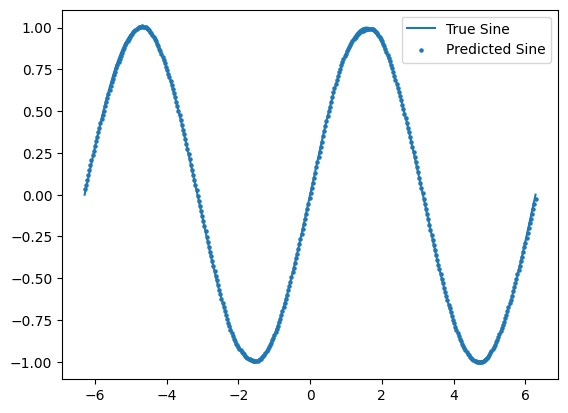

In [179]:
model.eval()
x_test = torch.tensor(np.linspace(-2*np.pi, 2*np.pi, 400).reshape(-1, 1), dtype=torch.float, requires_grad=True)
with torch.no_grad():
    y_test = model(x_test)

# Plot the results
plt.plot(x_values, y_train_sin, label='True Sine')
# make scatter with small point
plt.scatter(x_test.detach().numpy(), y_test.detach().numpy(), label='Predicted Sine', s=5)
plt.legend()
plt.show()

In [180]:
# analytical gradient of exp(sin(x))
# y_test_grad = torch.exp(torch.sin(x_test)) * torch.cos(x_test)

# analytical gradient of sin(x)
y_test_grad = torch.cos(x_test)

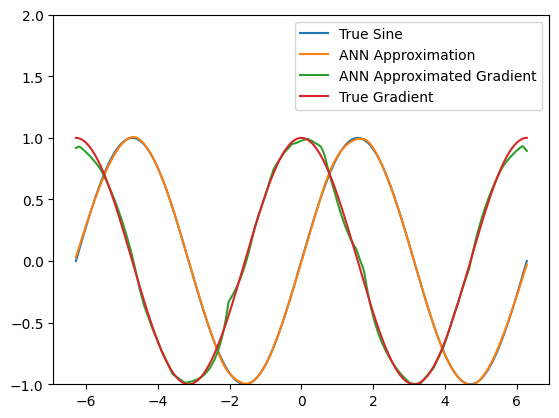

In [181]:
# x_test.requires_grad = True

x_test.grad = None
y_pred = model(x_test)
y_pred.sum().backward()

# x_test.grad

# Plot the gradient
plt.plot(x_values, y_train_sin, label='True Sine')
plt.plot(x_test.detach().numpy(), y_test.detach().numpy(), label='ANN Approximation') #linestyle='dashed')
plt.plot(x_test.detach().numpy(), x_test.grad.detach().numpy(), label='ANN Approximated Gradient')
plt.plot(x_test.detach().numpy(), y_test_grad.detach().numpy(), label='True Gradient')
plt.legend()
plt.ylim(-1.0, 2.0)
plt.show()